[[3. 2. 4.]
 [1. 2. 2.]
 [2. 6. 2.]] 

[[2.   0.75 0.9  1.75 2.  ]
 [1.   0.5  0.5  0.75 1.  ]
 [1.   1.   1.   1.   1.  ]] 



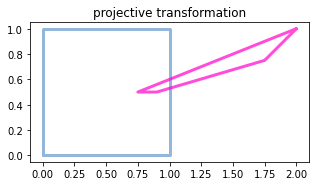

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv

# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
#print(P.T,"\n")
#print(P,"\n")
# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5
t = np.pi/3
#H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]] #rotate
#fname="rotate"
#H = np.array([[2, 0, 0.], [0, 2, 0.], [0., 0., 1.]]) #scale
#fname="pure scaling"
#H = np.array([[1, 0, 1.], [0, 1, 1.], [0., 0., 1.]]) #translation
#fname="pure translation"
#H = [[np.cos(t), np.sin(t), 1.], [-np.sin(t), np.cos(t), 1.], [0., 0., 1.]] #rotate+translate
#fname="rotate+translate"
#H = np.array([[1, 1, 0.], [0, 1, 0.], [0., 0., 1.]])
#fname="affine transformation"
#H = [[2*np.cos(t), 2*np.sin(t), 1.], [-np.sin(t)*2, 2*np.cos(t), 1.], [0., 0., 1.]] #rotate+translate+scale
#fname="rotate+translate+scaling"
H = np.array([[3, 2, 4.], [1, 2, 2.], [2., 6., 2.]])
fname="projective transformation"
print(H,"\n")
Pt = np.matmul(H, P)
P = P/P[-1]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0]
y = P[1]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0]
yt = Pt[1]
print(Pt,"\n")
fig, ax = plt.subplots(1,1,figsize=(5,5), sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.set_title(fname)
plt.savefig(fname+".png")

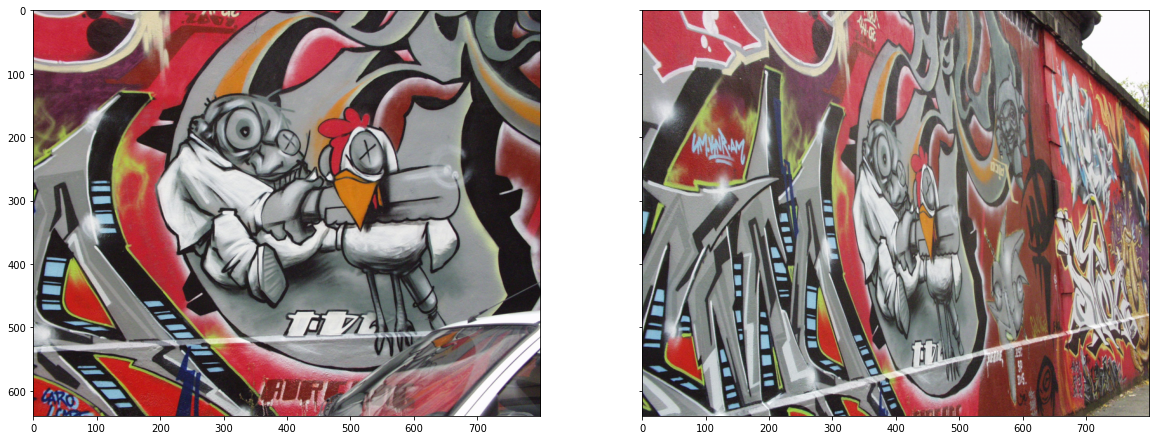

In [16]:
img1=cv.imread("./graffiti/img1.ppm")
cv.imwrite("img1.jpg",img1)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img5=cv.imread("./graffiti/img5.ppm")
cv.imwrite("img5.jpg",img5)
img5=cv.cvtColor(img5,cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2,figsize=(20,20),sharey=True)
ax[0].imshow(img1)
ax[1].imshow(img5)
plt.savefig("warp.png")
plt.show()

In [81]:
def stitch(img1,img2,H):
    img1w = cv.warpPerspective(img1, H, (850,800))
    img2p=np.zeros(img1w.shape,dtype=np.uint8)
    img2p[0:img2.shape[0], 0:img2.shape[1]] = img2
    for i in range(img1w.shape[0]):
        for j in range(img1w.shape[1]):
            if img1w[i,j].all()==0:
                img1w[i,j]=img2p[i,j]
    return img1w
def tick(n):
    ax[n].xticks([])
    ax[n].yticks([])
    return True

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


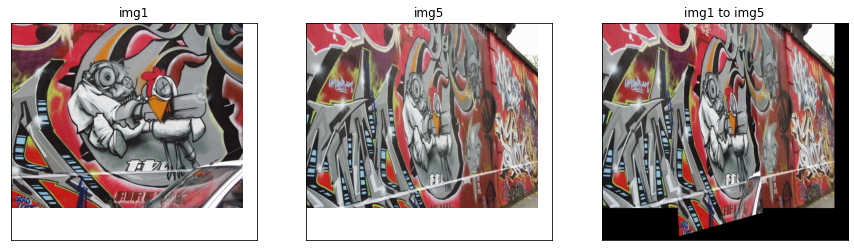

In [45]:
im1 = cv.imread('./graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./graffiti/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('./graffiti/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
#im1_warped = cv.warpPerspective(im1, H, (850,750))
#im5_pad=np.zeros(im1_warped.shape,dtype=np.uint8)
#im5_pad[0:im5.shape[0], 0:im5.shape[1]] = im5
im1_im5=stitch(im1,im5,H)
#im1_warped[0:im1.shape[0], 0:im1.shape[1]] = im5
fig, ax = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
ax[0].imshow(img1)
ax[0].set_title("img1")
ax[1].imshow(img5)
ax[1].set_title("img5")
cv.imwrite("img1 to img5_item2 code.jpg",im1_im5)
im1_im5=cv.cvtColor(im1_im5,cv.COLOR_RGB2BGR)
ax[2].imshow(im1_im5)
ax[2].set_title("img1 to img5")
plt.xticks([])
plt.yticks([])
plt.savefig("stitched 1 to 5.png")
plt.show()

[[ 43.  84.]
 [684.   8.]
 [750. 451.]
 [ 51. 492.]
 [446. 249.]] 

[[250.  83.]
 [488. 104.]
 [531. 491.]
 [282. 554.]
 [427. 303.]] 

[[ 1.96451527e+00 -1.19303458e-01 -4.38472168e+02]
 [-3.96922243e-01  8.75152746e-01  1.08578076e+02]
 [-9.95411999e-04  6.71184150e-05  1.22232868e+00]]


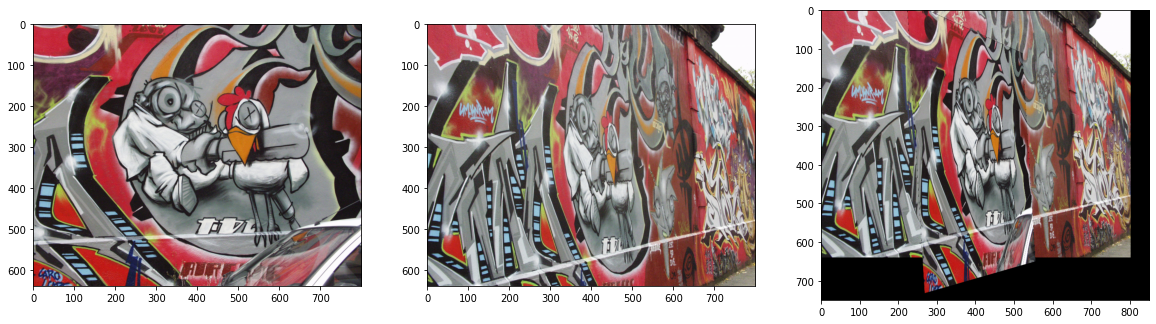

In [47]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
3# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('./graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./graffiti/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)
while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1,"\n")
print(p2,"\n")
cv.destroyAllWindows()
retvalm,maskm=cv.findHomography(p1,p2)
#print(retval,"\n")
Hm = np.array(retvalm)
print(np.linalg.inv(Hm))
#im5_mouse = cv.warpPerspective(im5, np.linalg.inv(Hm), (1000,1000))
#im5_mouse[0:im1.shape[0], 0:im1.shape[1]] = im1
im1_im5_mouse=stitch(im1,im5,Hm)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1)
ax[1].imshow(img5)
cv.imwrite("img1 to img5 item3.jpg",im1_im5_mouse)
im1_im5_mouse=cv.cvtColor(im1_im5_mouse,cv.COLOR_RGB2BGR)
ax[2].imshow(im1_im5_mouse)
plt.savefig("warp_mouse.png")
plt.show()

In [9]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
3# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('./graffiti/img5.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)
while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1,"\n")
print(p2,"\n")
cv.destroyAllWindows()

[[251.  80.]
 [487. 105.]
 [532. 489.]
 [281. 553.]
 [428. 302.]] 

[[ 43.  82.]
 [683.   9.]
 [747. 449.]
 [ 52. 492.]
 [445. 250.]] 



In [68]:
A=np.zeros((1,9))
for cod in range(len(p1)):
    x=p1[cod,0]
    y=p1[cod,1]
    xd=p2[cod,0]
    yd=p2[cod,1]
    atemp=np.array([[-x,-y,-1,0,0,0,x*xd,y*xd,xd],[0,0,0,-x,-y,-1,x*yd,y*yd,yd]])
    A=np.concatenate((A, atemp), axis=0)
print(A.shape)
A=A[1:-1]
u, s, vh = np.linalg.svd(A, full_matrices=True)
v=vh.T
s_min_index=np.where(s==min(s))[0]
hcalc=np.reshape(v[:,s_min_index],(3,3))
#h=h/h[2,2]
print(np.where(s==min(s))[0])
print(s[np.where(s==min(s))[0]])
print(np.linalg.inv(hcalc))

(11, 9)
[8]
[0.00060301]
[[-4.41005688e+02  2.61102270e+01  9.86506560e+04]
 [ 8.91458001e+01 -1.97102031e+02 -2.43353367e+04]
 [ 2.23331205e-01 -1.75107964e-02 -2.73577910e+02]]


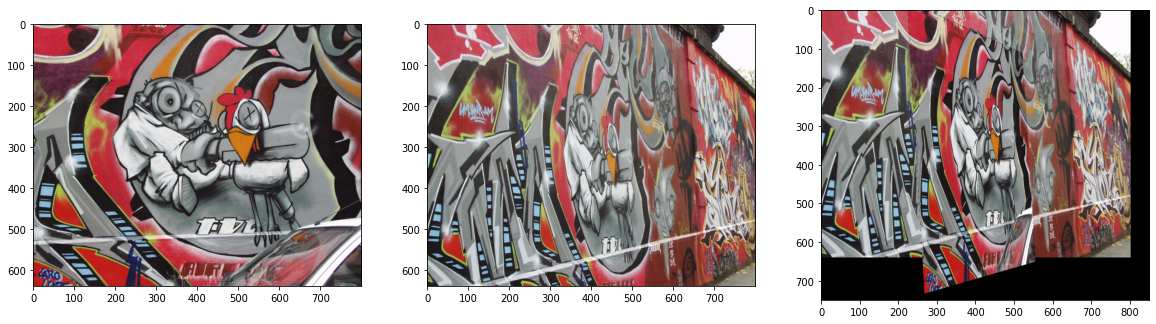

In [71]:
#im5_f = cv.warpPerspective(im5, np.linalg.inv(h), (1000,1000))
#im5_f[0:im1.shape[0], 0:im1.shape[1]] = im1
im1_im5_calc=stitch(im1,im5,hcalc)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1)
ax[1].imshow(img5)
cv.imwrite("img1 to img5 calc.jpg",im1_im5_calc)
im1_im5_calc=cv.cvtColor(im1_im5_calc,cv.COLOR_RGB2BGR)
ax[2].imshow(im1_im5_calc)
plt.savefig("warp_f.png")
plt.show()

In [78]:
%run D:/ACA/Github/SuperGluePretrainedNetwork/match_pairs.py

Namespace(input_pairs='D:/ACA/Sem4/image processing/ASSIGNMENTS/assignment2/graf.txt', input_dir='D:/ACA/Sem4/image processing/ASSIGNMENTS/assignment2/', output_dir='D:/ACA/Sem4/image processing/ASSIGNMENTS/assignment2/', max_length=-1, resize=[640, 480], resize_float=False, superglue='indoor', max_keypoints=1024, keypoint_threshold=0.005, nms_radius=4, sinkhorn_iterations=20, match_threshold=0.2, viz=False, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will resize to 640x480 (WxH)
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)
Looking for data in directory "D:\ACA\Sem4\image processing\ASSIGNMENTS\assignment2"
Will write matches to directory "D:\ACA\Sem4\image processing\ASSIGNMENTS\assignment2"
[Finished pair     0 of     1] load_image=0.019 matcher=4.415 viz_match=0.634 total=5.068 sec {0.2 FPS} 


In [161]:
path = 'img1_img5_matches.npz'
npz = np.load(path)
print(npz.files)
print(npz["matches"].shape)
print(npz["keypoints0"].shape)
#print(npz["match_confidence"])
#print(npz["keypoints1"],npz["keypoints1"].shape)
p1sp=np.array([[0,0]])
p2sp=np.array([[0,0]])
for i in range(len(matches)):
    if matches[i] != -1 and npz["match_confidence"][i]>0.941:
        p1sp=np.append(p1sp,[npz["keypoints0"][i]],axis=0)
        p2sp=np.append(p2sp,[npz["keypoints1"][matches[i]]],axis=0)
print(p1sp.shape)
print(p2sp.shape)

['keypoints0', 'keypoints1', 'matches', 'match_confidence']
(925,)
(925, 2)
(12, 2)
(12, 2)


[[ 2.05874446e+00 -1.21504876e-01 -3.70635253e+02]
 [-3.81140293e-01  9.11250760e-01  8.27162000e+01]
 [-1.17252167e-03  1.60000311e-04  1.21252926e+00]]
<ipython-input-162-4f9b79abe119>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


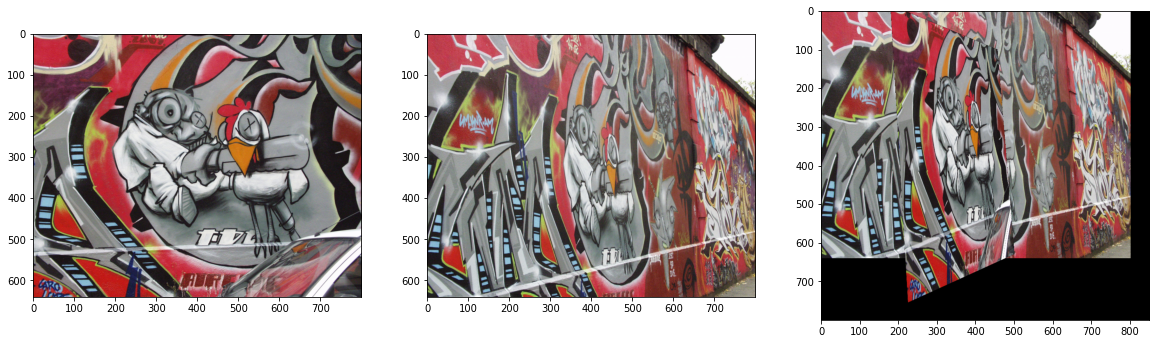

In [162]:
#retvalsp,masksp=cv.findHomography(p1sp,p2sp,method=cv.RANSAC)
#print(retval,"\n")
Hsp = np.array(cv.findHomography(p1sp[1:],p2sp[1:],method=cv.RANSAC)[0])
print(np.linalg.inv(Hsp))
#im5_sp = cv.warpPerspective(im5, Hsp, (1000,1000))
#im5_sp[0:im1.shape[0], 0:im1.shape[1]] = im1
im1_im5_sp=stitch(im1,im5,Hsp)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1)
ax[1].imshow(img5)
cv.imwrite("img1 to img5 sp.jpg",im1_im5_sp)
im1_im5_sp=cv.cvtColor(im1_im5_sp,cv.COLOR_RGB2BGR)
ax[2].imshow(im1_im5_sp)
plt.savefig("warp_sp.png")
plt.show()